# L10 - RNN

## Author - Rodolfo Lerma

# Problem:
Using the Keras dataset, create a new notebook and perform each of the following data preparation tasks and answer the related questions:

- Read Reuters dataset into training and testing 
- Prepare dataset
- Build and compile 3 different models using Keras LTSM ideally improving model at each iteration.
- Describe and explain your findings.

# Abstract:
Your next generation search engine startup was successful in having the ability to search for images based on their content. As a result, the startup received its second round of funding to be able to search news articles based on their topic. As the lead data scientist, you are tasked to build a model that classifies the topic of each article or newswire. 

For this assignment, you will leverage the RNN_KERAS.ipynb lab in the lesson. You are tasked to use the Keras Reuters newswire topics classification dataset. This dataset contains 11,228 newswires from Reuters, labeled with over 46 topics. Each wire is encoded as a sequence of word indexes. For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

The analysis is is divided the following way:

### Data Exploration
- **Looking at an example**


### Analysis
- **Processing the data**
- **Training variables (*hyperparameters*)**
- **RNN Model**
    - Based Model
    - 2nd Model
    - 3rd Model
- **Results**

        
### Summary of Findings

# Data Exploration 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.reuters

In [3]:
num_of_words = 10000
test_split_size = 0.2
(x_train, y_train), (x_test, y_test) = data.load_data(
    path="reuters.npz",
    num_words=num_of_words,
    test_split=test_split_size)

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


First look at the data:

In [4]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


As expected we have numbers and not words, as the words had been indexed by overall frequency.

In [5]:
print('# of Training Samples: {}'.format(len(x_train)))
print('# of Test Samples: {}'.format(len(x_test)))

num_classes = max(y_train) + 1
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 8982
# of Test Samples: 2246
# of Classes: 46


In [6]:
word_index = tf.keras.datasets.reuters.get_word_index()
# word_index = tf.keras.datasets.reuters.get_word_index(path="reuters_word_index.json")

In [7]:
word_index["<UNK>"] = 0

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

## Looking at an example

In [8]:
print('\nFirst Review \n')
print(decode_review(x_train[0]))
print('\nIts label :',y_train[0])


First Review 

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs

Its label : 3


# Analysis

## Processing the data

In [9]:
max_review_length = 256
x_train_padded = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test_padded  = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_length)

In [10]:
# from keras.utils import to_categorical
classes = 46
y_train_sparse = keras.utils.to_categorical(y_train, num_classes=classes)
y_test_sparse = keras.utils.to_categorical(y_test, num_classes=classes)

## Training variables (*hyperparameters*)

In [11]:
# Training varibles
learning_rate = 0.005
learning_rate_decay = 0.0001
batch_size = 512
epochs = 2 #Even though this would be computationally expensive, since the data set is not too big it will give us better prediction

# input shape is the vocabulary count used for the reviews (10,000 words)
vocab_size = 10000

## RNN Model

### Based Model

In [12]:
# embedding_vecor_length = 512

# model = Sequential()
# model.add(Dense(512, input_shape=(max_words,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# # model = keras.Sequential()
# # model.add(keras.layers.Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
# # model.add(keras.layers.GlobalAveragePooling1D())
# # model.add(keras.layers.Dense(256, activation = 'relu'))
# # model.add(keras.layers.Dropout(0.3))
# # model.add(keras.layers.Dense(46, activation = 'sigmoid'))

# model.summary()

# # optimizer
# optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=learning_rate_decay, amsgrad=False)

# # Model Compilation
# model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# model_history = model.fit(
#     x_train_padded,
#     y_train_sparse,
#     epochs=epochs,
#     batch_size=batch_size,
#     validation_data=(x_test_padded, y_test_sparse),
#     verbose=1)

# scores = model.evaluate(x_test_padded, y_test_sparse, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

In [23]:
x_train_padded1 = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=1000)
x_test_padded1  = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=1000)

model = keras.Sequential()
model.add(keras.layers.Dense(512, input_shape=(1000,)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(num_classes))
model.add(keras.layers.Activation('softmax'))

# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
# model.add(keras.layers.GlobalAveragePooling1D())
# model.add(keras.layers.Dense(256, activation = 'relu'))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(46, activation = 'sigmoid'))

model.summary()

# optimizer
#optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=learning_rate_decay, amsgrad=False)

# Model Compilation
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model_history = model.fit(
    x_train_padded1,
    y_train_sparse,
    epochs=epochs,
    batch_size=32,
    validation_data=(x_test_padded1, y_test_sparse),
    verbose=1)

scores = model.evaluate(x_test_padded1, y_test_sparse, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 46)                23598     
_________________________________________________________________
activation_11 (Activation)   (None, 46)                0         
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
281/281 [==============================] - 2s 7ms/step - loss: 607.6683 - accuracy: 0.2332 - val_loss: 4

### 2nd Model

In [24]:
embedding_vecor_length = 512
max_review_length = 1000

model1 = keras.Sequential()
model1.add(keras.layers.Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model1.add(keras.layers.GlobalAveragePooling1D())
model1.add(keras.layers.Dense(256, activation = 'relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(46, activation = 'softmax'))

model1.summary()

# optimizer
optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=learning_rate_decay, amsgrad=False)

# Model Compilation
model1.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model_history1 = model1.fit(
    x_train_padded,
    y_train_sparse,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_padded, y_test_sparse),
    verbose=1)

scores1 = model1.evaluate(x_test_padded, y_test_sparse, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 512)         5120000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 46)                11822     
Total params: 5,263,150
Trainable params: 5,263,150
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
18/18 [==============================] - 6s 326ms/step - loss: 3.0128 - accuracy: 0.3006 - val_loss:

### 3rd Model

In [26]:
embedding_vecor_length = 50

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model2.add(keras.layers.LSTM(200))
model2.add(keras.layers.Dense(46, activation = 'softmax'))

model2.summary()

# optimizer
optimizer = keras.optimizers.Adam()

# Model Compilation
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model_history2 = model2.fit(
    x_train_padded,
    y_train_sparse,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_padded, y_test_sparse),
    verbose=1)

scores2 = model2.evaluate(x_test_padded, y_test_sparse, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 50)          500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_21 (Dense)             (None, 46)                4646      
Total params: 565,046
Trainable params: 565,046
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
18/18 [==============================] - 39s 2s/step - loss: 3.6661 - accuracy: 0.2880 - val_loss: 2.5543 - val_accuracy: 0.3620
Epoch 2/2
18/18 [==============================] - 37s 2s/step - loss: 2.4805 - accuracy: 0.3366 - val_loss: 2.4293 - val_accuracy: 0.3620
Accuracy: 36.20%


## Results

In [16]:
scores = model2.evaluate(x_test_padded, y_test_sparse, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 37.49%


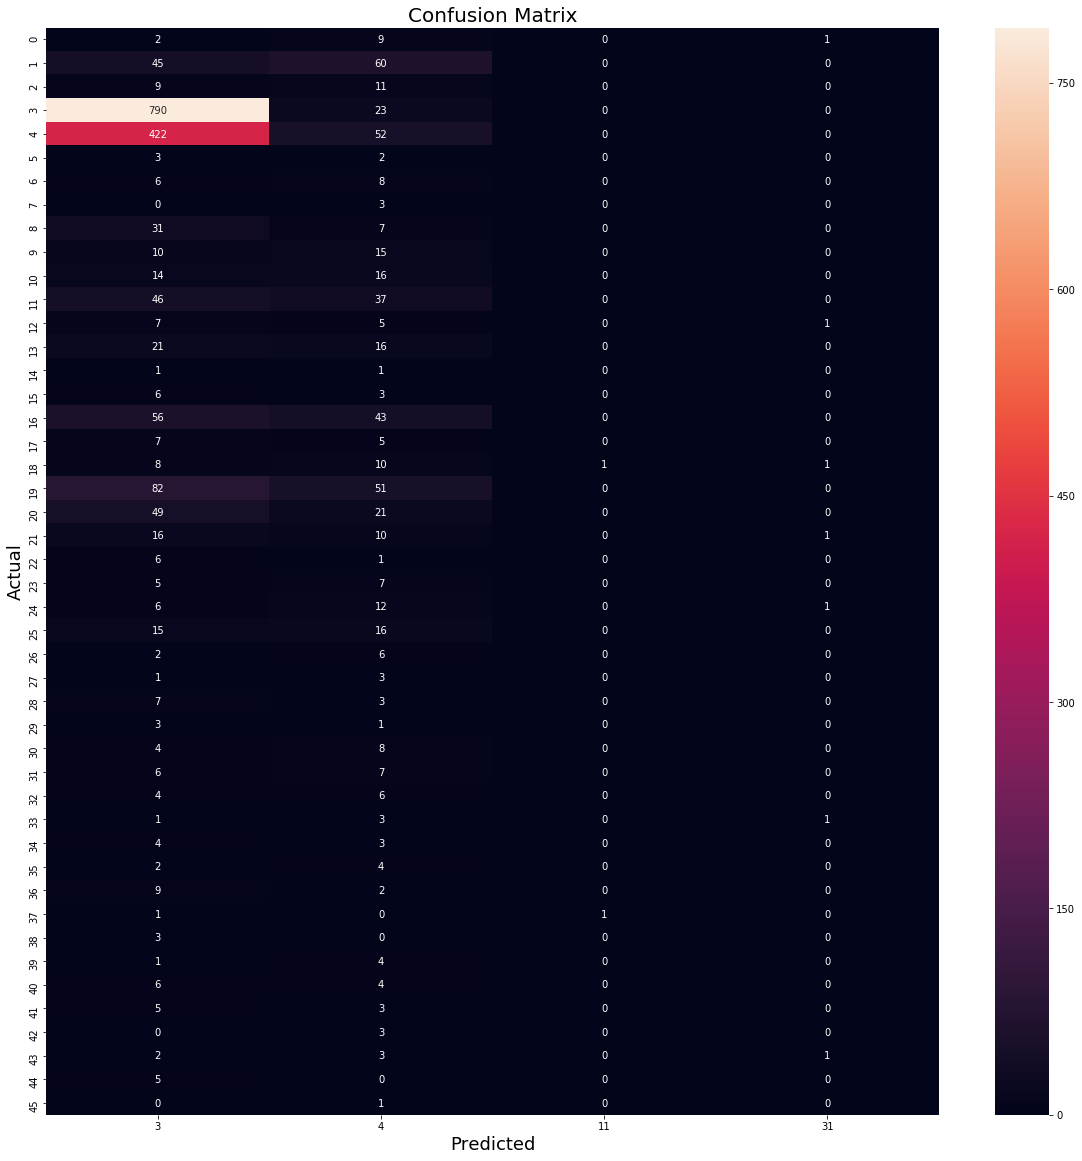

In [17]:
import pandas as pd
import seaborn as sns

y_pred = model2.predict(x_test_padded)

y_pred = np.argmax(y_pred,axis=1)
y_pred = pd.Series(y_pred, name='Predicted')
y_test = pd.Series(y_test, name='Actual')
df_confusion  = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
#print(df_confusion)
plt.figure(figsize = (20,20))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(df_confusion, annot=True,fmt="d")

# Summary of Findings

- It is possible to see that this artificial recurrent neural network (RNN) -> **Long short term memory** has a particulary great effect on the accuracy of this classification model, given by the fact that unlike standard feedforward neural networks, LSTM has feedback connections. It cannot only process single data points (such as images), but also entire sequences of data.

Build and compile 3 different models using Keras LTSM ideally improving model at each iteration.

